In [ ]:
!pip install opencv-python-headless tensorflow numpy matplotlib


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving hed_pretrained_bsds.caffemodel to hed_pretrained_bsds.caffemodel
Saving deploy.prototxt to deploy.prototxt


Saving cat.jpg to cat.jpg


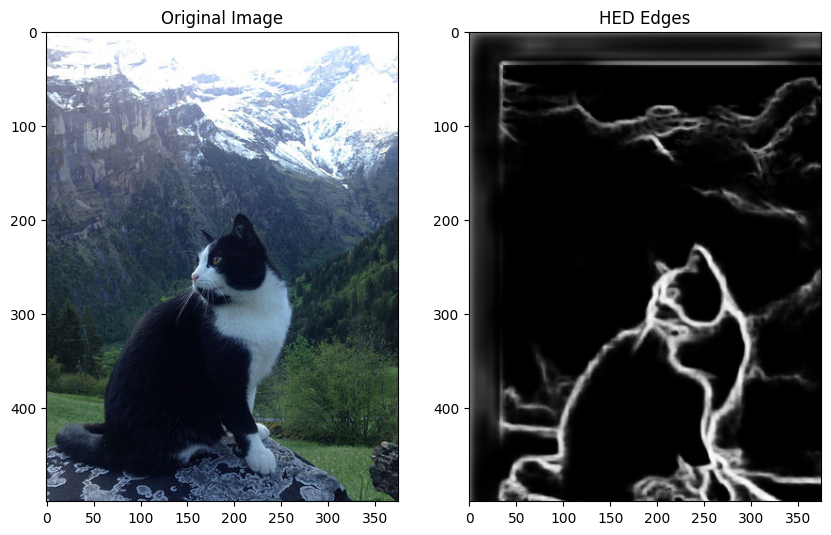

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the HED model
hed_model = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'hed_pretrained_bsds.caffemodel')

# Function to load and process the image
def process_image(image_path):
    image = cv2.imread(image_path)
    image_height, image_width = image.shape[:2]

    # Prepare the image for the HED model
    blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=(image_width, image_height),
                                 mean=(104.00698793, 116.66876762, 122.67891434),
                                 swapRB=False, crop=False)

    # Set the input to the HED model
    hed_model.setInput(blob)

    # Perform edge detection
    edges = hed_model.forward()

    # Reshape the output to the size of the input image
    edges = edges[0, 0]
    edges = cv2.resize(edges, (image_width, image_height))

    # Normalize the edges
    edges = (255 * edges).astype(np.uint8)

    return image, edges

# Upload the image file
uploaded = files.upload()

# Process the uploaded image
for fn in uploaded.keys():
    if fn.endswith(('.jpg', '.png')):
        image, edges = process_image(fn)

        # Display the results
        plt.figure(figsize=(10, 10))

        plt.subplot(1, 2, 1)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        plt.subplot(1, 2, 2)
        plt.title('HED Edges')
        plt.imshow(edges, cmap='gray')

        plt.show()
